In [1]:
!python split_dataset.py \
    --src dataset \
    --dest datasets/CEDAR_split \
    --train_ratio 0.7 \
    --val_ratio 0.15 \
    --seed 42


Dataset split complete. Output saved to datasets\CEDAR_split


In [ ]:
!python preprocess_batch.py \
    --src datasets/CEDAR_split/train \
    --dest datasets/CEDAR_pre/train \
    --size 224 \
    --blur 3 \
    --threshold


In [2]:
!python generate_synthetic_data.py \
  --ref reference_signatures/official_signature.png \
  --out datasets/custom_signature_dataset \
  --num_genuine 400 --num_forged 900


 Done. Genuine=400, Forged total=900


In [ ]:
import os

base_path = "datasets/custom_signature_dataset"

def count_files(path):
    total = 0
    for root, dirs, files in os.walk(path):
        total += len(files)
    return total

print("إجمالي كل الملفات:", count_files(base_path))
print("عدد الصور الأصلية:", count_files(os.path.join(base_path, "genuine")))
print("عدد الصور الأصلية:", count_files(os.path.join(base_path, "forged")))
print("عدد المزورة freehand:", count_files(os.path.join(base_path, "forged/freehand")))
print("عدد المزورة tracing:", count_files(os.path.join(base_path, "forged/tracing")))
print("عدد المزورة digital:", count_files(os.path.join(base_path, "forged/digital")))


In [ ]:
!python split_custom_signature.py \
  --src datasets/custom_signature_dataset \
  --dest datasets/custom_split \
  --train 0.7 \
  --val 0.15 \
  --seed 7 \
  --fix_forged_prefixes


In [3]:
import shutil, os

# احذفي المجلدات القديمة إن وجدت
for p in [
    "datasets/custom_signature_dataset",
    "datasets/custom_split",
    "datasets/custom_pre"
]:
    if os.path.exists(p):
        shutil.rmtree(p)
        print("Removed:", p)
    else:
        print("Not found:", p)


Removed: datasets/custom_signature_dataset
Removed: datasets/custom_split
Not found: datasets/custom_pre


In [7]:
!python generate_synthetic_data.py \
  --ref reference_signatures/official_signature.png \
  --out datasets/custom_signature_dataset \
  --num_genuine 400 \
  --num_forged 900


Done. Saved in one folder: datasets\custom_signature_dataset


In [10]:
!python generate_synthetic_data.py --ref reference_signatures/official_signature.png --out datasets/synth_separate --num_genuine 400 --num_forged 900


Done. Saved: 400 genuine, 900 forged
Folders: datasets\synth_separate\out_genuine | datasets\synth_separate\out_forged
Lists: datasets\synth_separate\genuine.txt | datasets\synth_separate\forged.txt


In [11]:
!python split_custom_signature.py \
  --src datasets/custom_signature_dataset \
  --dest datasets/custom_split \
  --train 0.7 --val 0.15 --seed 7 \
  --fix_forged_prefixes


[split] ratios: train=0.7, val=0.15, test=0.15
[split] fixing forged prefixes...
[split] class folders considered:

[done] summary:
  train -> 0 files
  val -> 0 files
  test -> 0 files


In [22]:
!python split_simple_two_classes.py --src datasets/custom_signature_dataset --dest datasets_split --train 0.7 --val 0.15 --seed 7


[info] found genuine=400 forged=900


Traceback (most recent call last):
  File "C:\Users\LEGlON\watheeq_signatures\split_simple_two_classes.py", line 93, in <module>
    main()
    ~~~~^^
  File "C:\Users\LEGlON\watheeq_signatures\split_simple_two_classes.py", line 66, in main
    for phase, (g_set, f_set) in {
               ^^^^^^^^^^^^^^
ValueError: too many values to unpack (expected 2)


In [18]:
import os
def count(p):
    c=0
    for _,_,fs in os.walk(p): c+=len(fs)
    return c
base="datasets/custom_split"
for phase in ["train","val","test"]:
    g=count(f"{base}/{phase}/genuine"); f=count(f"{base}/{phase}/forged")
    print(f"{phase}: genuine={g}, forged={f}, total={g+f}")


train: genuine=0, forged=0, total=0
val: genuine=0, forged=0, total=0
test: genuine=0, forged=0, total=0


In [26]:
import glob, os
for p in glob.glob("__pycache__/*split_simple_two_classes*"):
    try: os.remove(p)
    except: pass


In [28]:
!python split_simple_two_classes.py --src datasets/custom_signature_dataset --dest datasets/datasets_custom_split --train 0.7 --val 0.15 --seed 7


python: can't open file 'C:\\Users\\LEGlON\\watheeq_signatures\\split_simple_two_classes.py': [Errno 2] No such file or directory


In [29]:
# train
!python preprocess_batch.py \
    --src datasets/custom_signature_dataset_split/train \
    --dest datasets/custom_signature_dataset_pre/train \
    --size 224 \
    --blur 3 \
    --threshold

# val
!python preprocess_batch.py \
    --src datasets/custom_signature_dataset_split/val \
    --dest datasets/custom_signature_dataset_pre/val \
    --size 224 \
    --blur 3 \
    --threshold

# test
!python preprocess_batch.py \
    --src datasets/custom_signature_dataset_split/test \
    --dest datasets/custom_signature_dataset_pre/test \
    --size 224 \
    --blur 3 \
    --threshold


Processing complete. Output saved to datasets\custom_signature_dataset_pre\train
Processing complete. Output saved to datasets\custom_signature_dataset_pre\val
Processing complete. Output saved to datasets\custom_signature_dataset_pre\test


In [32]:
!rmdir /S /Q datasets\CEDAR_pre\train


In [33]:
# train
!python preprocess_batch.py \
    --src datasets/CEDAR_split/train \
    --dest datasets/CEDAR_pre/train \
    --size 224 \
    --blur 3 \
    --threshold

# val
!python preprocess_batch.py \
    --src datasets/CEDAR_split/val \
    --dest datasets/CEDAR_pre/val \
    --size 224 \
    --blur 3 \
    --threshold

# test
!python preprocess_batch.py \
    --src datasets/CEDAR_split/test \
    --dest datasets/CEDAR_pre/test \
    --size 224 \
    --blur 3 \
    --threshold


Processing complete. Output saved to datasets\CEDAR_pre\train
Processing complete. Output saved to datasets\CEDAR_pre\val
Processing complete. Output saved to datasets\CEDAR_pre\test


In [35]:
!python train_general_resnet18.py \
    --data_dir datasets/CEDAR_pre \
    --epochs 20 \
    --batch_size 32 \
    --lr 0.001 \
    --output models/resnet18_general.pth


Epoch 1/20: train_loss=0.5020, train_acc=0.7714, val_acc=0.0631
Epoch 2/20: train_loss=0.3546, train_acc=0.8418, val_acc=0.4520
Epoch 3/20: train_loss=0.2678, train_acc=0.8938, val_acc=0.0556
Epoch 4/20: train_loss=0.2095, train_acc=0.9187, val_acc=0.0707
Epoch 5/20: train_loss=0.1578, train_acc=0.9393, val_acc=0.0152
Epoch 6/20: train_loss=0.1477, train_acc=0.9447, val_acc=0.1540
Epoch 7/20: train_loss=0.1242, train_acc=0.9529, val_acc=0.2854
Epoch 8/20: train_loss=0.1054, train_acc=0.9567, val_acc=0.0354
Epoch 9/20: train_loss=0.1434, train_acc=0.9420, val_acc=0.0985
Epoch 10/20: train_loss=0.1055, train_acc=0.9567, val_acc=0.0076
Epoch 11/20: train_loss=0.0790, train_acc=0.9729, val_acc=0.0758
Epoch 12/20: train_loss=0.0959, train_acc=0.9664, val_acc=0.0429
Epoch 13/20: train_loss=0.0761, train_acc=0.9778, val_acc=0.0101
Epoch 14/20: train_loss=0.0609, train_acc=0.9767, val_acc=0.3889
Epoch 15/20: train_loss=0.1174, train_acc=0.9632, val_acc=0.0303
Epoch 16/20: train_loss=0.0502, tr

In [36]:
from torchvision.datasets import ImageFolder
from torchvision import transforms

root = "datasets/CEDAR_pre"
tfm = transforms.ToTensor()

train_ds = ImageFolder(f"{root}/train", transform=tfm)
val_ds   = ImageFolder(f"{root}/val",   transform=tfm)
test_ds  = ImageFolder(f"{root}/test",  transform=tfm)

print("train:", train_ds.class_to_idx)
print("val  :", val_ds.class_to_idx)
print("test :", test_ds.class_to_idx)


train: {'forged': 0, 'genuine': 1}
val  : {'.ipynb_checkpoints': 0, 'forged': 1, 'genuine': 2}
test : {'forged': 0, 'genuine': 1}


In [38]:
import os, shutil

ROOT = "datasets/CEDAR_pre"
JUNK_DIRS = {".ipynb_checkpoints", "__MACOSX"}
JUNK_FILES = {"Thumbs.db", "desktop.ini", ".DS_Store"}

for cur, dirs, files in os.walk(ROOT, topdown=True):
    # احذف المجلدات غير المرغوبة
    for d in list(dirs):
        if d in JUNK_DIRS:
            shutil.rmtree(os.path.join(cur, d), ignore_errors=True)
            dirs.remove(d)  # عشان ما ننزل داخلها لاحقًا
    # احذف ملفات النظام
    for f in files:
        if f in JUNK_FILES:
            try: os.remove(os.path.join(cur, f))
            except: pass

print("Cleaned junk from", ROOT)


Cleaned junk from datasets/CEDAR_pre


In [39]:
from torchvision.datasets import ImageFolder
from torchvision import transforms

root = "datasets/CEDAR_pre"
tfm = transforms.ToTensor()

print("train:", ImageFolder(f"{root}/train", transform=tfm).class_to_idx)
print("val  :", ImageFolder(f"{root}/val",   transform=tfm).class_to_idx)
print("test :", ImageFolder(f"{root}/test",  transform=tfm).class_to_idx)


train: {'forged': 0, 'genuine': 1}
val  : {'forged': 0, 'genuine': 1}
test : {'forged': 0, 'genuine': 1}


In [40]:
!python train_general_resnet18.py \
    --data_dir datasets/CEDAR_pre \
    --epochs 20 \
    --batch_size 32 \
    --lr 7e-4 \
    --output models/resnet18_general.pth


Epoch 1/20: train_loss=0.4513, train_acc=0.8039, val_acc=0.7241
Epoch 2/20: train_loss=0.2784, train_acc=0.8749, val_acc=0.8987
Epoch 3/20: train_loss=0.2091, train_acc=0.9215, val_acc=0.6506
Epoch 4/20: train_loss=0.1749, train_acc=0.9328, val_acc=0.8481
Epoch 5/20: train_loss=0.1535, train_acc=0.9393, val_acc=0.9291
Epoch 6/20: train_loss=0.1068, train_acc=0.9599, val_acc=0.9190
Epoch 7/20: train_loss=0.0919, train_acc=0.9653, val_acc=0.8810
Epoch 8/20: train_loss=0.1342, train_acc=0.9496, val_acc=0.9190
Epoch 9/20: train_loss=0.0861, train_acc=0.9670, val_acc=0.9291
Epoch 10/20: train_loss=0.0631, train_acc=0.9729, val_acc=0.8987
Epoch 11/20: train_loss=0.0360, train_acc=0.9859, val_acc=0.9215
Epoch 12/20: train_loss=0.0431, train_acc=0.9848, val_acc=0.9570
Epoch 13/20: train_loss=0.0619, train_acc=0.9762, val_acc=0.9114
Epoch 14/20: train_loss=0.0633, train_acc=0.9767, val_acc=0.8987
Epoch 15/20: train_loss=0.0728, train_acc=0.9707, val_acc=0.9570
Epoch 16/20: train_loss=0.0531, tr

In [42]:
!python finetune_resnet18_custom.py \
    --data_dir datasets/custom_signature_dataset_pre \
    --weights models/resnet18_general.pth \
    --epochs 15 \
    --batch_size 32 \
    --lr 0.0005 \
    --output models/resnet18_finetuned.pth


Epoch 1/15: train_loss=0.6165, train_acc=0.7736, val_acc=0.8469
Epoch 2/15: train_loss=0.3121, train_acc=0.8747, val_acc=0.6633
Epoch 3/15: train_loss=0.2554, train_acc=0.9055, val_acc=0.5714
Epoch 4/15: train_loss=0.2100, train_acc=0.9055, val_acc=0.5765
Epoch 5/15: train_loss=0.1800, train_acc=0.9451, val_acc=0.6378
Epoch 6/15: train_loss=0.1736, train_acc=0.9385, val_acc=0.5816
Epoch 7/15: train_loss=0.1667, train_acc=0.9396, val_acc=0.5765
Epoch 8/15: train_loss=0.1742, train_acc=0.9264, val_acc=0.5918
Epoch 9/15: train_loss=0.1247, train_acc=0.9473, val_acc=0.5867
Epoch 10/15: train_loss=0.1203, train_acc=0.9560, val_acc=0.5816
Epoch 11/15: train_loss=0.1222, train_acc=0.9571, val_acc=0.5918
Epoch 12/15: train_loss=0.1179, train_acc=0.9538, val_acc=0.5765
Epoch 13/15: train_loss=0.1351, train_acc=0.9538, val_acc=0.6020
Epoch 14/15: train_loss=0.1079, train_acc=0.9648, val_acc=0.5663
Epoch 15/15: train_loss=0.1275, train_acc=0.9495, val_acc=0.5816
Training complete. Best validation

Traceback (most recent call last):
  File "C:\Users\LEGlON\watheeq_signatures\finetune_resnet18_custom.py", line 85, in <module>
    main()
    ~~~~^^
  File "C:\Users\LEGlON\watheeq_signatures\finetune_resnet18_custom.py", line 81, in main
    print(f"Fine\u2011tuned model saved to {out_path}")
    ~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\LEGlON\anaconda3\Lib\encodings\cp1256.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
           ~~~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
UnicodeEncodeError: 'charmap' codec can't encode character '\u2011' in position 4: character maps to <undefined>


In [48]:
!python preprocess_batch.py \
  --src datasets/custom_signature_dataset_split/train \
  --dest datasets/custom_signature_dataset_pre/train \
  --size 224 \
  --blur 3 \
  --threshold


Processing complete. Output saved to datasets\custom_signature_dataset_pre\train


In [49]:
!python -X utf8 finetune_resnet18_custom.py \
  --data_dir datasets/custom_signature_dataset_pre \
  --weights models/resnet18_general.pth \
  --epochs 12 \
  --batch_size 32 \
  --lr 1e-4 \
  --output models/resnet18_finetuned.pth


Epoch 1/12: train_loss=1.3418, train_acc=0.6374, val_acc=0.7755
Epoch 2/12: train_loss=0.4233, train_acc=0.8033, val_acc=0.8622
Epoch 3/12: train_loss=0.3672, train_acc=0.8440, val_acc=0.8980
Epoch 4/12: train_loss=0.3068, train_acc=0.8780, val_acc=0.6735
Epoch 5/12: train_loss=0.2910, train_acc=0.8846, val_acc=0.6582
Epoch 6/12: train_loss=0.2516, train_acc=0.9077, val_acc=0.6327
Epoch 7/12: train_loss=0.2271, train_acc=0.9165, val_acc=0.5918
Epoch 8/12: train_loss=0.1763, train_acc=0.9407, val_acc=0.5918
Epoch 9/12: train_loss=0.1894, train_acc=0.9242, val_acc=0.5816
Epoch 10/12: train_loss=0.1456, train_acc=0.9407, val_acc=0.6020
Epoch 11/12: train_loss=0.1487, train_acc=0.9462, val_acc=0.5969
Epoch 12/12: train_loss=0.1511, train_acc=0.9484, val_acc=0.6224
Training complete. Best validation accuracy: 0.8980
Fineâ€‘tuned model saved to models\resnet18_finetuned.pth


In [51]:
!python -X utf8 finetune_resnet18_custom.py \
  --data_dir datasets/custom_signature_dataset_pre \
  --weights models/resnet18_general.pth \
  --epochs 3 \
  --batch_size 32 \
  --lr 3e-4 \
  --weight_decay 1e-4 \
  --scheduler cosine \
  --freeze_backbone \
  --output models/resnet18_stage1.pth


Device: cpu
class_to_idx: {'forged': 0, 'genuine': 1}
Loaded (backbone only). missing: ['fc.weight', 'fc.bias'] unexpected: []
Epoch 1/3: train_loss=0.5386, train_acc=0.7484, val_acc=0.7806, lr=0.000225
Saved BEST to models\resnet18_stage1.pth val_acc= 0.7806
Epoch 2/3: train_loss=0.5377, train_acc=0.7747, val_acc=0.7755, lr=0.000075
Epoch 3/3: train_loss=0.5264, train_acc=0.7769, val_acc=0.7806, lr=0.000000
Training complete. Best val_acc: 0.7806 time_sec= 129


C:\Users\LEGlON\anaconda3\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


In [52]:
import os
os.environ["PYTHONIOENCODING"] = "utf-8"


In [54]:
!python -X utf8 finetune_resnet18_custom.py \
  --data_dir datasets/custom_signature_dataset_pre \
  --weights models/resnet18_stage1.pth \
  --epochs 15 \
  --batch_size 32 \
  --lr 1e-4 \
  --weight_decay 1e-4 \
  --scheduler cosine \
  --output models/resnet18_finetuned.pth


Device: cpu
class_to_idx: {'forged': 0, 'genuine': 1}
Loaded (backbone only). missing: ['fc.weight', 'fc.bias'] unexpected: []
Epoch 1/15: train_loss=0.2450, train_acc=0.9308, val_acc=0.9847, lr=0.000099
Saved BEST to models\resnet18_finetuned.pth val_acc= 0.9847
Epoch 2/15: train_loss=0.0667, train_acc=0.9769, val_acc=0.9694, lr=0.000096
Epoch 3/15: train_loss=0.0478, train_acc=0.9824, val_acc=0.9745, lr=0.000090
Epoch 4/15: train_loss=0.0255, train_acc=0.9923, val_acc=0.9745, lr=0.000083
Epoch 5/15: train_loss=0.0124, train_acc=0.9956, val_acc=0.9847, lr=0.000075
Epoch 6/15: train_loss=0.0097, train_acc=0.9967, val_acc=0.9745, lr=0.000065
Epoch 7/15: train_loss=0.0048, train_acc=1.0000, val_acc=0.9796, lr=0.000055
Epoch 8/15: train_loss=0.0019, train_acc=1.0000, val_acc=0.9847, lr=0.000045
Epoch 9/15: train_loss=0.0016, train_acc=1.0000, val_acc=0.9847, lr=0.000035
Epoch 10/15: train_loss=0.0035, train_acc=0.9989, val_acc=0.9847, lr=0.000025
Epoch 11/15: train_loss=0.0016, train_acc=

C:\Users\LEGlON\anaconda3\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


In [55]:
import os
p="models/resnet18_finetuned.pth"
print(os.path.exists(p), round(os.path.getsize(p)/1e6,2),"MB")


True 44.79 MB


In [1]:
import torch

model = torch.load("models/resnet18_finetuned.pth", map_location="cpu")
model.eval()

# هنا تحمّلين بيانات الاختبار
# ثم تحسبين الدقة


AttributeError: 'collections.OrderedDict' object has no attribute 'eval'

In [3]:
import torch
import torch.nn as nn
import torchvision.models as models

# حمّلي هيكل الموديل أول
model = models.resnet18(weights=None)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2)  # عدد الكلاسات عندك

# حمّلي الأوزان
state_dict = torch.load("models/resnet18_finetuned.pth", map_location="cpu")
model.load_state_dict(state_dict)

# وضع التقييم
model.eval()

print("Model ready for inference!")


Model ready for inference!


In [1]:
import os
os.environ["PYTHONIOENCODING"] = "utf-8"


In [3]:
!python evaluate_model.py --model_path models/resnet18_finetuned.pth --data_root datasets/custom_signature_dataset_pre --batch_size 32



===== SUMMARY =====
VAL : acc=0.9847  prec=0.9833  rec=0.9672  f1=0.9752
      best_thr=0.480 (F1=0.9752)  conf=[[134, 1], [2, 59]]
TEST: acc=0.9846  prec=0.9831  rec=0.9667  f1=0.9748  conf=[[134,1],[2,58]]


Traceback (most recent call last):
  File "C:\Users\LEGlON\watheeq_signatures\evaluate_model.py", line 182, in <module>
    main()
  File "C:\Users\LEGlON\watheeq_signatures\evaluate_model.py", line 167, in main
    with open(json_path, "w", encoding="utf-8") as f: json.dump(rep, f, ensure_ascii=False, indent=2)
  File "C:\Users\LEGlON\anaconda3\envs\tf39\lib\json\__init__.py", line 179, in dump
    for chunk in iterable:
  File "C:\Users\LEGlON\anaconda3\envs\tf39\lib\json\encoder.py", line 431, in _iterencode
    yield from _iterencode_dict(o, _current_indent_level)
  File "C:\Users\LEGlON\anaconda3\envs\tf39\lib\json\encoder.py", line 405, in _iterencode_dict
    yield from chunks
  File "C:\Users\LEGlON\anaconda3\envs\tf39\lib\json\encoder.py", line 405, in _iterencode_dict
    yield from chunks
  File "C:\Users\LEGlON\anaconda3\envs\tf39\lib\json\encoder.py", line 325, in _iterencode_list
    yield from chunks
  File "C:\Users\LEGlON\anaconda3\envs\tf39\lib\json\encoder.py", line 

In [7]:
!python evaluate_model.py --model_path models/resnet18_finetuned.pth --data_root datasets/custom_signature_dataset_pre --batch_size 32



===== SUMMARY =====
VAL : acc=0.9847  prec=0.9833  rec=0.9672  f1=0.9752
      best_thr=0.480 (F1=0.9752)  conf=[[134, 1], [2, 59]]
TEST: acc=0.9846  prec=0.9831  rec=0.9667  f1=0.9748  conf=[[134, 1], [2, 58]]

Saved reports to:
  reports\eval_report.json
  reports\eval_report.txt


In [8]:
!python -X utf8 evaluate_model.py --data_root datasets/custom_signature_dataset_pre \
  --model_path models/resnet18_finetuned.pth --batch_size 64 \
  --forgery_breakdown --save_plots



===== SUMMARY =====
VAL : acc=0.9847  prec=0.9833  rec=0.9672  f1=0.9752
      best_thr=0.480 (F1=0.9752)  conf=[[134, 1], [2, 59]]
TEST: acc=0.9846  prec=0.9831  rec=0.9667  f1=0.9748  conf=[[134, 1], [2, 58]]

-- Forgery detection rates (TEST) --
freehand  N=  0  detect_rate=None
tracing   N=  0  detect_rate=None
digital   N=  0  detect_rate=None

Saved reports to:
  reports\eval_report.json
  reports\eval_report.txt
Saved plots to: reports


In [13]:
!python -X utf8 plot_training_curves.py --log_path models/resnet18_finetuned.log.csv --out_dir reports --smooth_k 3


Saved: reports\loss_curves.png and reports\loss_curves.svg
Saved: reports\acc_curves.png and reports\acc_curves.svg


In [19]:
!python -X utf8 plot_and_report_curves.py


In [21]:
!python -X utf8 plot_and_report_curves.py \
  --loss_png reports/loss_curves.png \
  --acc_png reports/acc_curves.png \
  --eval_json reports/eval_report.json \
  --out_dir reports \
  --title "Watheeq Signature Verification — Evaluation Report"


Saved merged image: reports\curves_combined.png
Saved PDF report : reports\watheeq_signature_eval.pdf


In [1]:
!python -X utf8 generate_training_report.py --log_path models/resnet18_finetuned.log.csv --out_dir reports --title "Watheeq Signature — Training Report" --smooth_k 3


Saved combined plot: reports\combined_curves.png
Saved PDF: reports\training_report.pdf


In [2]:
!python -X utf8 plot_and_report_curves.py \
  --log_csv models/resnet18_finetuned.log.csv \
  --eval_json reports/eval_report.json \
  --out_dir reports \
  --title "Watheeq Signature Verification — Evaluation Report" \
  --smooth_k 3


Saved combined plot: reports\combined_curves.png
Saved PDF report : reports\watheeq_signature_eval.pdf


In [4]:
!python -X utf8 predict_new.py --model models/resnet18_finetuned.pth --image path/to/new_signature.png --threshold 0.48


In [2]:
!python -X utf8 train_siamese.py ^
  --data_dir datasets/custom_signature_dataset_pre/train ^
  --val_dir datasets/custom_signature_dataset_pre/val ^
  --epochs 10 ^
  --batch_size 32 ^
  --lr 3e-4 ^
  --weight_decay 1e-4 ^
  --scheduler cosine ^
  --no_pretrained ^
  --freeze_backbone ^
  --output models/siamese_resnet18.pth


IndentationError: unexpected indent (1784121928.py, line 2)

In [3]:
!python -X utf8 train_siamese.py --data_dir datasets/custom_signature_dataset_pre/train --val_dir datasets/custom_signature_dataset_pre/val --epochs 10 --batch_size 32 --lr 3e-4 --weight_decay 1e-4 --scheduler cosine --no_pretrained --freeze_backbone --output models/siamese_resnet18.pth


usage: train_siamese.py [-h] --data_dir DATA_DIR [--epochs EPOCHS]
                        [--batch_size BATCH_SIZE] [--lr LR] [--output OUTPUT]
train_siamese.py: error: unrecognized arguments: --val_dir datasets/custom_signature_dataset_pre/val --weight_decay 1e-4 --scheduler cosine --no_pretrained --freeze_backbone


In [4]:
!python train_siamese.py \
  --data_dir datasets/custom_signature_dataset_pre/train \
  --epochs 15 \
  --batch_size 32 \
  --lr 3e-4 \
  --output models/siamese_resnet18.pth


Epoch 1/15: loss=0.5742
Epoch 2/15: loss=0.5485
Epoch 3/15: loss=0.5525
Epoch 4/15: loss=0.5451
Epoch 5/15: loss=0.5479
Epoch 6/15: loss=0.5422
Epoch 7/15: loss=0.5557
Epoch 8/15: loss=0.5406
Epoch 9/15: loss=0.5233
Epoch 10/15: loss=0.5338
Epoch 11/15: loss=0.5414
Epoch 12/15: loss=0.5424
Epoch 13/15: loss=0.5480
Epoch 14/15: loss=0.5329
Epoch 15/15: loss=0.5218
Siamese model saved to models\siamese_resnet18.pth


In [5]:
!python -X utf8 evaluate_siamese.py --model_path models/siamese_resnet18.pth --val_dir datasets/custom_signature_dataset_pre/val --out_json reports/siamese_val_report.json


Traceback (most recent call last):
  File "C:\Users\LEGlON\watheeq_signatures\evaluate_siamese.py", line 173, in <module>
    main()
  File "C:\Users\LEGlON\watheeq_signatures\evaluate_siamese.py", line 101, in main
    m_backbone.load_state_dict({k.replace("backbone.",""):v for k,v in state["state_dict"].items() if k.startswith("backbone.")}, strict=False)
KeyError: 'state_dict'


In [6]:
!python -X utf8 evaluate_siamese.py --model_path models/siamese_resnet18.pth --val_dir datasets/custom_signature_dataset_pre/val --out_json reports/siamese_val_report.json


Loaded. missing keys: ['head.0.weight', 'head.0.bias', 'head.2.weight', 'head.2.bias']  ...
        unexpected  : ['embedding.0.weight', 'embedding.0.bias', 'embedding.2.weight', 'embedding.2.bias']  ...


Traceback (most recent call last):
  File "C:\Users\LEGlON\watheeq_signatures\evaluate_siamese.py", line 200, in <module>
    main()
  File "C:\Users\LEGlON\watheeq_signatures\evaluate_siamese.py", line 134, in main
    E_gen  = embed(model, gen,  device=device)
  File "C:\Users\LEGlON\anaconda3\envs\tf39\lib\site-packages\torch\utils\_contextlib.py", line 120, in decorate_context
    return func(*args, **kwargs)
  File "C:\Users\LEGlON\watheeq_signatures\evaluate_siamese.py", line 74, in embed
    e = model(x)
  File "C:\Users\LEGlON\anaconda3\envs\tf39\lib\site-packages\torch\nn\modules\module.py", line 1773, in _wrapped_call_impl
    return self._call_impl(*args, **kwargs)
  File "C:\Users\LEGlON\anaconda3\envs\tf39\lib\site-packages\torch\nn\modules\module.py", line 1784, in _call_impl
    return forward_call(*args, **kwargs)
  File "C:\Users\LEGlON\watheeq_signatures\evaluate_siamese.py", line 64, in forward
    f = self.backbone(x)
  File "C:\Users\LEGlON\anaconda3\envs\tf39\lib\

In [8]:
!python -X utf8 evaluate_siamese.py --model_path models/siamese_resnet18.pth --val_dir datasets/custom_signature_dataset_pre/val --out_json reports/siamese_val_report.json


Loaded. missing keys: [] ...
        unexpected  : [] ...
VAL ~ best_thr=0.346  F1=0.7085  Prec=0.7000  Rec=0.7172  AUC~=0.2455  CM=(169, 75, 69, 175)
Saved: reports/siamese_val_report.json


In [9]:
!python -X utf8 evaluate_siamese.py --model_path models/siamese_resnet18.pth --val_dir datasets/custom_signature_dataset_pre/val --out_json reports/siamese_val_report.json


Loaded. missing keys: [] ...
        unexpected  : [] ...
[DIST] rule=le  thr=0.346  F1=0.7085  Prec=0.7000  Rec=0.7172  AUC~=0.7545  CM=(169, 75, 69, 175)
[COS ] thr=0.922  F1=0.7735  Prec=0.6504  Rec=0.9541  AUC~=0.7032  CM=(43, 201, 18, 374)
Saved: reports/siamese_val_report.json


In [11]:
!python -X utf8 evaluate_siamese.py \
  --model_path models/siamese_resnet18.pth \
  --ref_dir reference_signatures \
  --val_dir datasets/custom_signature_dataset_pre/val \
  --test_dir datasets/custom_signature_dataset_pre/test \
  --optimize_for precision_at_fpr --target_fpr 0.01 \
  --save_json reports/siamese_eval.json \
  --save_hist reports/siamese_val_hist.png \
  --write_threshold models/siamese_threshold.txt


Loaded model. missing: []  unexpected: []
Protocol: REFERENCE (ref=1)
[VAL] metric=cosine thr=0.9817 F1=0.0923 Prec=0.7500 Rec=0.0492 FAR=0.0074 FRR=0.9508
Saved histogram: reports/siamese_val_hist.png
[TEST] metric=cosine thr=0.9817 F1=0.0923 Prec=0.6000 Rec=0.0500 FAR=0.0148 FRR=0.9500
Saved report: reports/siamese_eval.json
Saved threshold to: models/siamese_threshold.txt


In [13]:
!python -X utf8 evaluate_siamese.py \
  --model_path models/siamese_resnet18.pth \
  --ref_dir reference_signatures \
  --val_dir datasets/custom_signature_dataset_pre/val \
  --test_dir datasets/custom_signature_dataset_pre/test \
  --metric dist \
  --optimize_for f1 \
  --save_json reports/siamese_eval_f1_dist.json \
  --save_hist reports/siamese_val_hist_f1_dist.png \
  --write_threshold models/siamese_threshold_f1_dist.txt


usage: evaluate_siamese.py [-h] --model_path MODEL_PATH --val_dir VAL_DIR
                           [--test_dir TEST_DIR] [--ref_dir REF_DIR]
                           [--optimize_for {precision_at_fpr,f1,recall,balanced}]
                           [--target_fpr TARGET_FPR] [--save_json SAVE_JSON]
                           [--save_hist SAVE_HIST]
                           [--write_threshold WRITE_THRESHOLD]
evaluate_siamese.py: error: unrecognized arguments: --metric dist


In [14]:
!python -X utf8 evaluate_siamese.py --model_path models/siamese_resnet18.pth --ref_dir reference_signatures --val_dir datasets/custom_signature_dataset_pre/val --test_dir datasets/custom_signature_dataset_pre/test --optimize_for f1 --save_json reports/siamese_eval.json --save_hist reports/siamese_val_hist.png --write_threshold models/siamese_threshold.txt


Loaded model. missing: []  unexpected: []
Protocol: REFERENCE (ref=2)
[VAL] metric=cosine thr=0.9491 F1=0.6522 Prec=0.5844 Rec=0.7377 FAR=0.2370 FRR=0.2623
Saved histogram: reports/siamese_val_hist.png
[TEST] metric=cosine thr=0.9491 F1=0.6377 Prec=0.5641 Rec=0.7333 FAR=0.2519 FRR=0.2667
Saved report: reports/siamese_eval.json
Saved threshold to: models/siamese_threshold.txt


In [15]:
!python -X utf8 evaluate_siamese.py --model_path models/siamese_resnet18.pth --ref_dir reference_signatures --val_dir datasets/custom_signature_dataset_pre/val --test_dir datasets/custom_signature_dataset_pre/test --optimize_for precision_at_fpr --target_fpr 0.02 --save_json reports/siamese_eval_fpr2.json --save_hist reports/siamese_val_hist_fpr2.png --write_threshold models/siamese_threshold_fpr2.txt


Loaded model. missing: []  unexpected: []
Protocol: REFERENCE (ref=2)
[VAL] metric=distance thr=0.1946 F1=0.1471 Prec=0.7143 Rec=0.0820 FAR=0.0148 FRR=0.9180
Saved histogram: reports/siamese_val_hist_fpr2.png
[TEST] metric=distance thr=0.1946 F1=0.0923 Prec=0.6000 Rec=0.0500 FAR=0.0148 FRR=0.9500
Saved report: reports/siamese_eval_fpr2.json
Saved threshold to: models/siamese_threshold_fpr2.txt


In [17]:
!python preprocess_batch.py \
  --src reference_signatures \
  --dest reference_signatures_pre \
  --size 224 \
  --blur 3 \
  --threshold


Processing complete. Output saved to reference_signatures_pre


In [19]:
!python -X utf8 evaluate_siamese.py \
  --model_path models/siamese_resnet18.pth \
  --ref_dir reference_signatures_pre \
  --val_dir datasets/custom_signature_dataset_pre/val \
  --test_dir datasets/custom_signature_dataset_pre/test \
  --optimize_for precision_at_fpr --target_fpr 0.05 \
  --save_json reports/siamese_eval_ref1.json \
  --save_hist reports/siamese_val_hist_ref1.png \
  --write_threshold models/siamese_threshold_ref1.txt


Loaded model. missing: []  unexpected: []
Protocol: REFERENCE (ref=2)
[VAL] metric=cosine thr=0.9951 F1=0.0000 Prec=0.0000 Rec=0.0000 FAR=0.0296 FRR=1.0000
Saved histogram: reports/siamese_val_hist_ref1.png
[TEST] metric=cosine thr=0.9951 F1=0.0000 Prec=0.0000 Rec=0.0000 FAR=0.0296 FRR=1.0000
Saved report: reports/siamese_eval_ref1.json
Saved threshold to: models/siamese_threshold_ref1.txt


In [20]:
import os, glob, shutil

ref_dir = "reference_signatures"  # غيّريه لو استخدمتي *_pre
files = [f for f in glob.glob(os.path.join(ref_dir, "*")) if os.path.isfile(f)]
print("REF files:", files)

# احتفظي بواحدة فقط (الأفضل أنظف صورة بصيغة PNG)
keep = [f for f in files if f.lower().endswith(".png")]
keep = keep[:1] or files[:1]
for f in files:
    if f not in keep:
        os.remove(f)

print("Kept:", keep)


REF files: ['reference_signatures\\official_signature.png']
Kept: ['reference_signatures\\official_signature.png']


In [21]:
!python preprocess_batch.py \
  --src reference_signatures \
  --dest reference_signatures_pre \
  --size 224 \
  --blur 3 \
  --threshold


Processing complete. Output saved to reference_signatures_pre


In [22]:
!python -X utf8 evaluate_siamese.py \
  --model_path models/siamese_resnet18.pth \
  --ref_dir reference_signatures_pre \
  --val_dir datasets/custom_signature_dataset_pre/val \
  --test_dir datasets/custom_signature_dataset_pre/test \
  --optimize_for f1 \
  --save_json reports/siamese_eval_f1.json \
  --save_hist reports/siamese_val_hist_f1.png \
  --write_threshold models/siamese_threshold_f1.txt


Loaded model. missing: []  unexpected: []
Protocol: REFERENCE (ref=2)
[VAL] metric=cosine thr=0.8848 F1=0.4747 Prec=0.3112 Rec=1.0000 FAR=1.0000 FRR=0.0000
Saved histogram: reports/siamese_val_hist_f1.png
[TEST] metric=cosine thr=0.8848 F1=0.4646 Prec=0.3041 Rec=0.9833 FAR=1.0000 FRR=0.0167
Saved report: reports/siamese_eval_f1.json
Saved threshold to: models/siamese_threshold_f1.txt


In [23]:
import os, shutil, glob

# اختاري ملف المرجع الذي تريدين اعتماده
src_candidates = sorted(
    [p for p in glob.glob("reference_signatures_pre/*") 
     if os.path.isfile(p) and p.lower().endswith((".png",".jpg",".jpeg",".bmp",".tif",".tiff"))]
) or sorted(
    [p for p in glob.glob("reference_signatures/*") 
     if os.path.isfile(p) and p.lower().endswith((".png",".jpg",".jpeg",".bmp",".tif",".tiff"))]
)

print("Found candidates:", src_candidates)
assert len(src_candidates) >= 1, "لا يوجد أي صورة مرجعية. ضعي صورة واحدة على الأقل في reference_signatures/ أو reference_signatures_pre/"

# اختاري أنظف واحدة (عدلي الفهرس إذا تبغي غير الأولى)
chosen = src_candidates[0]
print("Chosen:", chosen)

# أنشئي مجلد مرجع أحادي
dst_dir = "reference_single"
os.makedirs(dst_dir, exist_ok=True)

# نظفيه
for f in glob.glob(os.path.join(dst_dir, "*")):
    os.remove(f)

# انسخي الصورة المختارة فقط
dst_file = os.path.join(dst_dir, os.path.basename(chosen))
shutil.copy2(chosen, dst_file)

print("Final ref dir contents:", glob.glob(os.path.join(dst_dir, "*")))


Found candidates: ['reference_signatures_pre\\official_signature.png']
Chosen: reference_signatures_pre\official_signature.png
Final ref dir contents: ['reference_single\\official_signature.png']


In [24]:
!python -X utf8 evaluate_siamese.py --model_path models/siamese_resnet18.pth --ref_dir reference_single --val_dir datasets/custom_signature_dataset_pre/val --test_dir datasets/custom_signature_dataset_pre/test --optimize_for precision_at_fpr --target_fpr 0.05 --save_json reports/siamese_eval_fpr5.json --save_hist reports/siamese_val_hist_fpr5.png --write_threshold models/siamese_threshold_fpr5.txt


Loaded model. missing: []  unexpected: []
Protocol: REFERENCE (ref=1)
[VAL] metric=cosine thr=0.9951 F1=0.0000 Prec=0.0000 Rec=0.0000 FAR=0.0296 FRR=1.0000
Saved histogram: reports/siamese_val_hist_fpr5.png
[TEST] metric=cosine thr=0.9951 F1=0.0000 Prec=0.0000 Rec=0.0000 FAR=0.0296 FRR=1.0000
Saved report: reports/siamese_eval_fpr5.json
Saved threshold to: models/siamese_threshold_fpr5.txt


In [26]:
import torch, glob
from PIL import Image
import torchvision.transforms as T
from torchvision.models import resnet18
import torch.nn.functional as F

# مساراتك
ref_path = "reference_single/official_signature.png"
val_gen   = sorted(glob.glob("datasets/custom_signature_dataset_pre/val/genuine/*"))[:5]
val_forg  = sorted(glob.glob("datasets/custom_signature_dataset_pre/val/forged/*"))[:5]

# <<< اجعلها 3 قنوات مع normalize لثلاث قنوات
tfm = T.Compose([
    T.Grayscale(num_output_channels=3),   # 3 قنوات
    T.Resize((224,224)),
    T.ToTensor(),
    T.Normalize(mean=[0.5,0.5,0.5], std=[0.5,0.5,0.5]),
])

backbone = resnet18(weights=None)
backbone.fc = torch.nn.Identity()
backbone.eval()

def emb(path):
    x = tfm(Image.open(path).convert("L")).unsqueeze(0)
    with torch.no_grad():
        e = backbone(x)                 # [1, 512]
        e = F.normalize(e, p=2, dim=1)  # L2
    return e

# ref vs ref
eref1 = emb(ref_path); eref2 = emb(ref_path)
cs_ref = F.cosine_similarity(eref1, eref2).item()
print("cosine(ref, ref) =", cs_ref)

# ref vs بعض العينات
def mean_cos(paths):
    if not paths: return None
    sims = []
    for p in paths:
        e = emb(p)
        sims.append(F.cosine_similarity(eref1, e).item())
    return sum(sims)/len(sims)

print("mean cosine(ref, genuine) =", mean_cos(val_gen))
print("mean cosine(ref, forged)  =", mean_cos(val_forg))


cosine(ref, ref) = 1.0
mean cosine(ref, genuine) = 0.9991711497306823
mean cosine(ref, forged)  = 0.9995965600013733


In [28]:
import torch, glob
from PIL import Image
import torchvision.transforms as T
from torchvision.models import resnet18
import torch.nn as nn
import torch.nn.functional as F

ckpt_path = "models/siamese_resnet18.pth"
ref_path  = "reference_single/official_signature.png"
val_gen   = sorted(glob.glob("datasets/custom_signature_dataset_pre/val/genuine/*"))[:50]
val_forg  = sorted(glob.glob("datasets/custom_signature_dataset_pre/val/forged/*"))[:50]

# نفس التحويلات (3 قنوات + normalize)
tfm = T.Compose([
    T.Grayscale(num_output_channels=3),
    T.Resize((224,224)),
    T.ToTensor(),
    T.Normalize(mean=[0.5,0.5,0.5], std=[0.5,0.5,0.5]),
])

# --- استنتاج المعمارية من الـcheckpoint ---
state = torch.load(ckpt_path, map_location="cpu")
sd = state.get("state_dict", state)
sd_fixed = {}
for k,v in sd.items():
    sd_fixed[k.replace("module.","")] = v

# إن وُجد "embedding.0.weight" نقرأ شكله لتحديد hidden_dim
hidden_dim = 256
if "embedding.0.weight" in sd_fixed:
    w = sd_fixed["embedding.0.weight"]
    hidden_dim = w.shape[0]  # 256 أو 512 غالبًا
print(f"[info] inferred hidden_dim={hidden_dim}")

# --- تعريف نفس معمارية السيامي كما في التدريب ---
class SiameseBackbone(nn.Module):
    def __init__(self, embed_dim=128, hidden_dim=256):
        super().__init__()
        self.backbone = resnet18(weights=None)
        self.backbone.fc = nn.Identity()
        self.embedding = nn.Sequential(
            nn.Linear(512, hidden_dim), nn.ReLU(inplace=True),
            nn.Linear(hidden_dim, embed_dim)
        )
    def forward(self, x):
        f = self.backbone(x)
        z = self.embedding(f)
        z = F.normalize(z, p=2, dim=1)  # L2 مهم
        return z

model = SiameseBackbone(embed_dim=128, hidden_dim=hidden_dim)
missing, unexpected = model.load_state_dict(sd_fixed, strict=False)
print("Loaded. missing:", missing, " unexpected:", unexpected)
model.eval()

def emb_img(path):
    x = tfm(Image.open(path).convert("L")).unsqueeze(0)
    with torch.no_grad():
        return model(x)

def mean_cos(e_ref, paths):
    sims=[]
    for p in paths:
        e = emb_img(p)
        sims.append(F.cosine_similarity(e_ref, e).item())
    return sum(sims)/len(sims) if sims else None

# sanity
e_ref1 = emb_img(ref_path); e_ref2 = emb_img(ref_path)
print("cosine(ref, ref) =", float(F.cosine_similarity(e_ref1, e_ref2)))

mc_g = mean_cos(e_ref1, val_gen)
mc_f = mean_cos(e_ref1, val_forg)
print("mean cosine(ref, genuine) =", mc_g)
print("mean cosine(ref, forged)  =", mc_f)


[info] inferred hidden_dim=512
Loaded. missing: []  unexpected: []
cosine(ref, ref) = 1.0
mean cosine(ref, genuine) = 0.9301555752754211
mean cosine(ref, forged)  = 0.9538103997707367


In [32]:
import shutil
import os

# المجلدات التي تخص السيامي فقط
folders_to_delete = [
    "dataset/siamese_train",
    "dataset/siamese_val",
    "outputs/siamese",
    "logs/siamese",
    "reports/siamese",
    "models/siamese_resnet18.pth",
    "models/siamese_threshold*.txt"
]

for folder in folders_to_delete:
    try:
        if os.path.isdir(folder):
            shutil.rmtree(folder)
            print(f"تم حذف المجلد: {folder}")
        elif os.path.isfile(folder):
            os.remove(folder)
            print(f"تم حذف الملف: {folder}")
    except Exception as e:
        print(f"خطأ أثناء حذف {folder}: {e}")


In [35]:
import shutil
import os

paths_to_delete = [
    "dataset/siamese_train",
    "dataset/siamese_test",
    "dataset/siamese_val"
]

for path in paths_to_delete:
    if os.path.exists(path):
        shutil.rmtree(path)
        print(f"تم حذف المجلد: {path}")
    else:
        print(f"المجلد غير موجود: {path}")


المجلد غير موجود: dataset/siamese_train
المجلد غير موجود: dataset/siamese_test
المجلد غير موجود: dataset/siamese_val


In [37]:
!python train_siamese.py


 سيتم التدريب على: cpu


Traceback (most recent call last):
  File "C:\Users\LEGlON\watheeq_signatures\train_siamese.py", line 77, in <module>
    train_dataset = SignatureDataset("datasets/siamese_dataset/train")
  File "C:\Users\LEGlON\watheeq_signatures\train_siamese.py", line 61, in __init__
    self.files = os.listdir(root_dir)
FileNotFoundError: [WinError 3] The system cannot find the path specified: 'datasets/siamese_dataset/train'


In [43]:
!python create_siamese_dataset.py


 تم إنشاء مجلدات السيامي بنجاح!


Traceback (most recent call last):
  File "C:\Users\LEGlON\watheeq_signatures\create_siamese_dataset.py", line 37, in <module>
    genuine_images = [f for f in os.listdir(os.path.join(SOURCE_DIR, "genuine"))]
FileNotFoundError: [WinError 3] The system cannot find the path specified: 'watheeq_signatures/datasets/custom_signature_dataset_pre\\genuine'


In [47]:
!python prepare_siamese_dataset.py


 تم تجهيز بيانات السيامي بنجاح!


In [53]:
!python train_siamese.py


Model: "functional_1"
+--------------------------------------------------------------------------+
| Layer (type)        | Output Shape      |    Param # | Connected to      |
|---------------------+-------------------+------------+-------------------|
| input_layer_1       | (None, 100, 150,  |          0 | -                 |
| (InputLayer)        | 1)                |            |                   |
|---------------------+-------------------+------------+-------------------|
| input_layer_2       | (None, 100, 150,  |          0 | -                 |
| (InputLayer)        | 1)                |            |                   |
|---------------------+-------------------+------------+-------------------|
| functional          | (None, 1024)      | 15,613,760 | input_layer_1[0]… |
| (Functional)        |                   |            | input_layer_2[0]… |
|---------------------+-------------------+------------+-------------------|
| lambda (Lambda)     | (None, 1)         |          0

2025-08-24 02:23:02.041462: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-24 02:23:03.172185: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-24 02:23:07.701959: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.

Traceback (most recent call last):
  File "C:\Users\LEGlON\watheeq_signature

🔍 بدء الاختبار ...


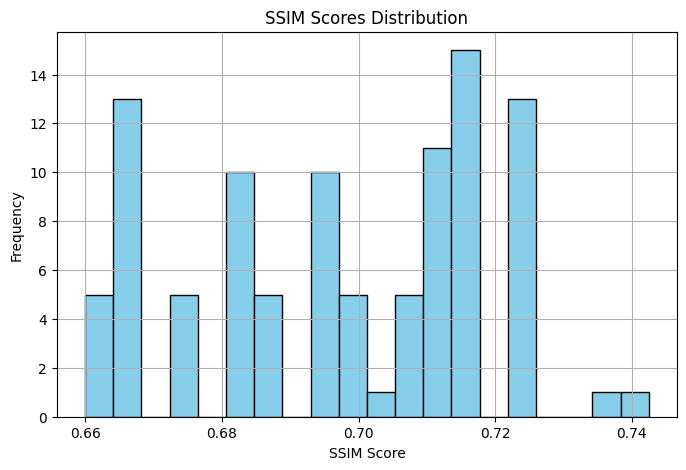

✅ أعلى SSIM: 0.74
❌ أقل SSIM: 0.66
🔎 المتوسط: 0.70
🔧 Threshold المقترح: 0.77


In [54]:
import os
import cv2
import numpy as np
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt

# مسارات البيانات
base_dir = "datasets/custom_signature_dataset_pre/test"
genuine_dir = os.path.join(base_dir, "genuine")
forged_dir = os.path.join(base_dir, "forged")

def compare_images(img1, img2):
    img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    img2_gray = cv2.resize(img2_gray, (img1_gray.shape[1], img1_gray.shape[0]))
    score, _ = ssim(img1_gray, img2_gray, full=True)
    return score

results = []
genuine_files = sorted(os.listdir(genuine_dir))[:10]
forged_files = sorted(os.listdir(forged_dir))[:10]

print("🔍 بدء الاختبار ...")

for gf in genuine_files:
    img_path = os.path.join(genuine_dir, gf)
    img_original = cv2.imread(img_path)
    for ff in forged_files:
        img_forged_path = os.path.join(forged_dir, ff)
        img_forged = cv2.imread(img_forged_path)
        score = compare_images(img_original, img_forged)
        results.append(score)

plt.figure(figsize=(8, 5))
plt.hist(results, bins=20, color='skyblue', edgecolor='black')
plt.title("SSIM Scores Distribution")
plt.xlabel("SSIM Score")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

print(f"✅ أعلى SSIM: {np.max(results):.2f}")
print(f"❌ أقل SSIM: {np.min(results):.2f}")
print(f"🔎 المتوسط: {np.mean(results):.2f}")

suggested_threshold = np.mean(results) * 1.1
print(f"🔧 Threshold المقترح: {suggested_threshold:.2f}")


In [56]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# جرّب أكثر من قيمة للعتبة
thresholds = [0.65, 0.70, 0.75]

for th in thresholds:
    y_true = []  # 1 = أصلية، 0 = مزورة
    y_pred = []
    for gf in genuine_files:
        img_path = os.path.join(genuine_dir, gf)
        img_original = cv2.imread(img_path)
        for ff in forged_files:
            img_forged_path = os.path.join(forged_dir, ff)
            img_forged = cv2.imread(img_forged_path)
            score = compare_images(img_original, img_forged)
            y_true.append(0)  # صور مزورة
            y_pred.append(1 if score >= th else 0)

    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"🔹 Threshold = {th} | ✅ Accuracy = {acc:.2f} | 🎯 F1-score = {f1:.2f}")


🔹 Threshold = 0.65 | ✅ Accuracy = 0.00 | 🎯 F1-score = 0.00
🔹 Threshold = 0.7 | ✅ Accuracy = 0.53 | 🎯 F1-score = 0.00
🔹 Threshold = 0.75 | ✅ Accuracy = 1.00 | 🎯 F1-score = 0.00


C:\Users\LEGlON\anaconda3\envs\tf39\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [58]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

def evaluate_threshold(threshold):
    y_true, y_pred = [], []

    #  المقارنات بين الأصلية والأصلية (يجب تكون متطابقة)
    for i in range(len(genuine_files)):
        for j in range(i+1, len(genuine_files)):
            img1 = cv2.imread(os.path.join(genuine_dir, genuine_files[i]))
            img2 = cv2.imread(os.path.join(genuine_dir, genuine_files[j]))
            score = compare_images(img1, img2)
            y_true.append(1)  # أصلية
            y_pred.append(1 if score >= threshold else 0)

    #  المقارنات بين الأصلية والمزورة
    for gf in genuine_files:
        img1 = cv2.imread(os.path.join(genuine_dir, gf))
        for ff in forged_files:
            img2 = cv2.imread(os.path.join(forged_dir, ff))
            score = compare_images(img1, img2)
            y_true.append(0)  # مزورة
            y_pred.append(1 if score >= threshold else 0)

    # حساب المقاييس
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    # طباعة النتيجة
    print(f" Threshold = {threshold:.2f} | ✅ Accuracy = {acc:.2f} |  Precision = {prec:.2f} |  Recall = {rec:.2f} |  F1 = {f1:.2f}")

    # رسم مصفوفة الالتباس
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["مزور", "أصلي"], yticklabels=["مزور", "أصلي"])
    plt.xlabel("القيمة المتوقعة")
    plt.ylabel("القيمة الحقيقية")
    plt.show()

# نجرب أفضل ثلاث قيم للعتبة
for th in [0.65, 0.70, 0.75]:
    evaluate_threshold(th)


ModuleNotFoundError: No module named 'seaborn'

In [62]:
from compare_signatures import compare_signatures

original = "datasets/custom_signature_dataset_pre/test/genuine/genuine_00024.png"
test = "datasets/custom_signature_dataset_pre/test/forged/forged_00121.png"

result = compare_signatures(original, test, threshold=0.75)
result


{'SSIM': np.float64(0.704),
 'Cosine': np.float64(0.939),
 'Threshold': 0.75,
 'Decision': '❌ مزور'}

In [64]:
from compare_signatures import compare_signatures

original = "datasets/custom_signature_dataset_pre/test/genuine/genuine_00024.png"
test = "datasets/custom_signature_dataset_pre/test/genuine/genuine_00029.png"

result = compare_signatures(original, test, threshold=0.65)
print(result)


{'SSIM': np.float64(0.676), 'Cosine': np.float64(0.932), 'Threshold': 0.65, 'Decision': '✅ أصلي'}


In [71]:
!python evaluate_model_comper.py


 بدء التقييم ...

 أفضل عتبة: 0.4
 الدقة: 0.308
 Precision: 0.308
 Recall: 1.0
 F1-score: 0.471
Figure(800x500)
Figure(800x500)



100%|##########| 11/11 [12:13<00:00, 66.65s/it]


In [75]:
!python evaluate_model_comper.py




بدء التقييم ...


أفضل عتبة: 0.30
الدقة: 0.692
Precision: 0.000
Recall: 0.000
F1-score: 0.000
Figure(800x500)



 Testing Threshold=0.30: 100%|##########| 60/60 [01:27<00:00,  1.46s/it]

 Testing Threshold=0.35: 100%|##########| 60/60 [01:22<00:00,  1.38s/it]

 Testing Threshold=0.40: 100%|##########| 60/60 [01:22<00:00,  1.38s/it]

 Testing Threshold=0.45: 100%|##########| 60/60 [01:23<00:00,  1.38s/it]

 Testing Threshold=0.50: 100%|##########| 60/60 [01:22<00:00,  1.38s/it]

 Testing Threshold=0.55: 100%|##########| 60/60 [01:22<00:00,  1.38s/it]

 Testing Threshold=0.60: 100%|##########| 60/60 [01:24<00:00,  1.40s/it]

 Testing Threshold=0.65: 100%|##########| 60/60 [01:22<00:00,  1.38s/it]

 Testing Threshold=0.70: 100%|##########| 60/60 [01:22<00:00,  1.38s/it]

 Testing Threshold=0.75: 100%|##########| 60/60 [01:21<00:00,  1.36s/it]

 Testing Threshold=0.80: 100%|##########| 60/60 [01:21<00:00,  1.36s/it]

 Testing Threshold=0.85: 100%|##########| 60/60 [01:20<00:00,  1.35s/it]

 Testing Threshold=0.90: 100%|##########| 60/60 [01:20<00:00,  1.35s/it]

 Testing Threshold=0.95: 100%|#######

In [11]:
!python predict_model.py --model models/resnet18_finetuned.pth --image datasets/CEDAR_pre/test/forged/forgeries_1_3.png


Image: datasets/CEDAR_pre/test/forged/forgeries_1_3.png
Decision:  Forged | Confidence: 0.83


C:\Users\LEGlON\anaconda3\envs\tf39\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\LEGlON\anaconda3\envs\tf39\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [8]:
!python predict_model.py --model models/resnet18_finetuned.pth --image datasets/custom_signature_dataset_pre/test/genuine/genuine_00029.png


Image: datasets/custom_signature_dataset_pre/test/genuine/genuine_00029.png
Decision:  Genuine | Confidence: 0.95


C:\Users\LEGlON\anaconda3\envs\tf39\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\LEGlON\anaconda3\envs\tf39\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [13]:
!python predict_model.py --model models/resnet18_finetuned.pth --image datasets/CEDAR_pre/test/genuine/original_33_2.png


Image: datasets/CEDAR_pre/test/genuine/original_33_2.png
Decision:  Genuine | Confidence: 1.00


C:\Users\LEGlON\anaconda3\envs\tf39\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\LEGlON\anaconda3\envs\tf39\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [15]:
!python predict_model.py --model models/resnet18_finetuned.pth --image datasets/CEDAR_pre/test/genuine/original_28_6.png


C:\Users\LEGlON\anaconda3\envs\tf39\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\LEGlON\anaconda3\envs\tf39\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Image: datasets/CEDAR_pre/test/genuine/original_28_6.png
Decision: Genuine  | Confidence: 0.96


In [18]:
!python predict_model.py --model models/resnet18_finetuned.pth --image datasets/custom_signature_dataset_pre/test/genuine/genuine_00029.png




 Image: datasets/custom_signature_dataset_pre/test/genuine/genuine_00029.png
 Decision:  Forged (مزور)
 Confidence: 0.95



In [19]:
!python predict_model.py --model models/resnet18_finetuned.pth --image datasets/CEDAR_pre/test/genuine/original_28_6.png




 Image: datasets/CEDAR_pre/test/genuine/original_28_6.png
 Decision:  Genuine (أصلي)
 Confidence: 0.96



In [20]:
!python predict_model.py --model models/resnet18_finetuned.pth --image datasets/custom_signature_dataset_pre/test/genuine/genuine_00029.png



 Image: datasets/custom_signature_dataset_pre/test/genuine/genuine_00029.png
 Decision:  Forged (مزور)
 Confidence: 0.95



In [21]:
!python predict_model.py --model models/resnet18_finetuned.pth --image datasets/CEDAR_pre/test/forged/forgeries_1_3.png



 Image: datasets/CEDAR_pre/test/forged/forgeries_1_3.png
 Decision:  Genuine (أصلي)
 Confidence: 0.83



In [25]:
!python predict_resnet18.py --model models/resnet18_finetuned.pth --image datasets/custom_signature_dataset_pre/test/genuine/genuine_00024.png


Image: datasets/custom_signature_dataset_pre/test/genuine/genuine_00024.png
Decision: Genuine (أصلي)
Confidence: 0.79


In [26]:
!python predict_resnet18.py --model models/resnet18_finetuned.pth --image datasets/custom_signature_dataset_pre/test/genuine/genuine_00024.png


Image: datasets/custom_signature_dataset_pre/test/genuine/genuine_00024.png
Decision: Genuine (أصلي)
Confidence: 0.79


In [27]:
!python predict_resnet18.py --model models/resnet18_finetuned.pth --image datasets/custom_signature_dataset_pre/test/genuine/genuine_00024.png



Model: ResNet18 (Fine-Tuned)
Image: datasets/custom_signature_dataset_pre/test/genuine/genuine_00024.png
Decision: Genuine (أصلي)
Confidence: 79.48%
Figure(640x480)


In [29]:
!python predict_resnet18.py --model models/resnet18_finetuned.pth --image datasets/custom_signature_dataset_pre/test/genuine/genuine_00024.png --outdir output



Model: ResNet18 (Fine-Tuned)
Image: datasets/custom_signature_dataset_pre/test/genuine/genuine_00024.png
Decision: Genuine (أصلي)
Confidence: 79.48%
تم حفظ الصورة مع النتيجة في: output\result.png


Model: ResNet18 (Fine-Tuned)
Image: datasets/custom_signature_dataset_pre/test/genuine/genuine_00024.png
Decision: Genuine (أصلي)
Confidence: 79.48%


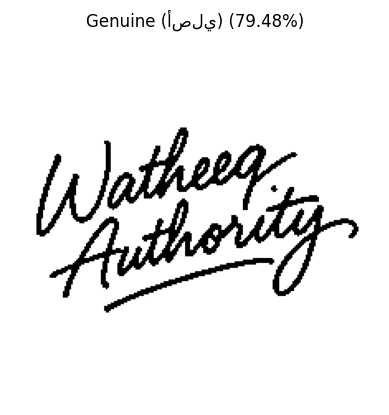

In [30]:
from predict_resnet18 import run_in_notebook

run_in_notebook(
    "models/resnet18_finetuned.pth",
    "datasets/custom_signature_dataset_pre/test/genuine/genuine_00024.png"
)


In [32]:
!python predict_siamese.py --model models/siamese_finetuned.pth --image datasets/custom_signature_dataset_pre/test/genuine/genuine_00020.png --ref datasets/custom_signature_dataset_pre/reference/ref_genuine.png


Traceback (most recent call last):
  File "C:\Users\LEGlON\watheeq_signatures\predict_siamese.py", line 60, in <module>
    model = load_siamese(args.model, device)
  File "C:\Users\LEGlON\watheeq_signatures\predict_siamese.py", line 32, in load_siamese
    model = torch.load(model_path, map_location=device)
  File "C:\Users\LEGlON\anaconda3\envs\tf39\lib\site-packages\torch\serialization.py", line 1484, in load
    with _open_file_like(f, "rb") as opened_file:
  File "C:\Users\LEGlON\anaconda3\envs\tf39\lib\site-packages\torch\serialization.py", line 759, in _open_file_like
    return _open_file(name_or_buffer, mode)
  File "C:\Users\LEGlON\anaconda3\envs\tf39\lib\site-packages\torch\serialization.py", line 740, in __init__
    super().__init__(open(name, mode))
FileNotFoundError: [Errno 2] No such file or directory: 'models/siamese_finetuned.pth'
